In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *





#wmt modes

process_gen_modes=[ "wmt_samples0", "wmt_samples1", "wmt_samples2_1","wmt_samples2_2", "wmt_samples3", "wmt_samples4",]


dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)
examples_df = pd.concat(list(dfs_by_model.values()))





/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']
mode is wmttask_names is ['wmt_14_language_pair_de_en_']


hello2


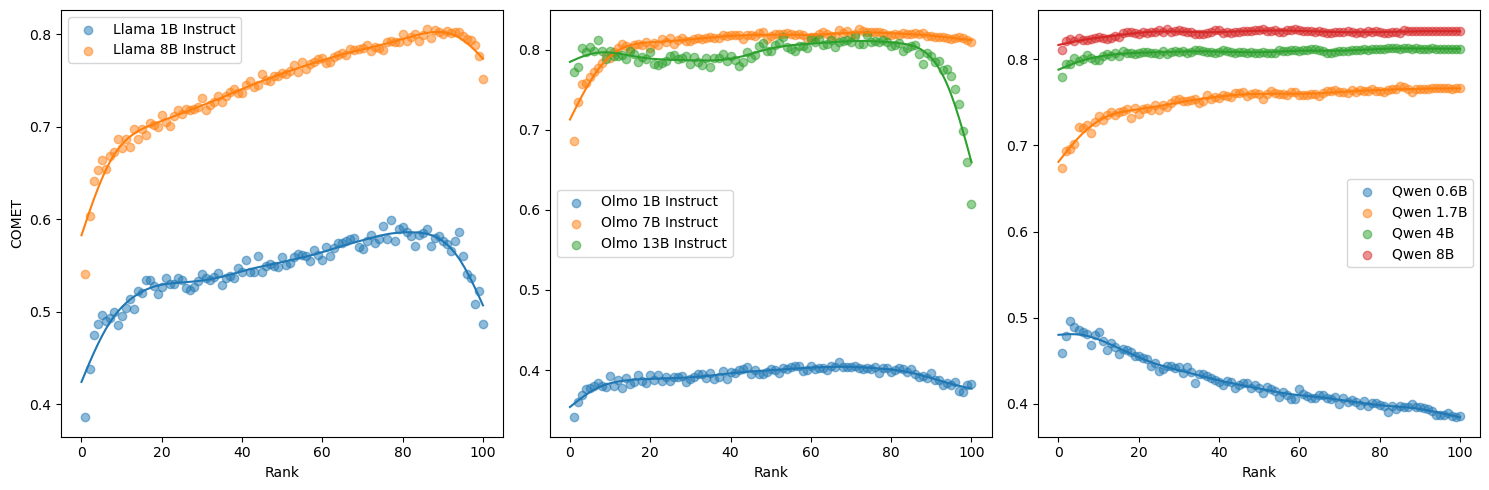

In [2]:


def plot_gam(df, compare_metric, ax,color, label):

    if(ax is None):
        _, ax = plt.subplots(figsize=(10, 10))
    
    grouped = df.groupby("example_idx")[["rank", compare_metric]].mean()


    # Assuming df is your dataframe
    X = grouped["rank"].values
    y = grouped[compare_metric].values


    gam = LinearGAM(s(0))

    # Fit the model to the data
    gam.fit(X, y)

    X_pred = np.linspace(0, 100,200).reshape(-1, 1)
    y_pred = gam.predict(X_pred)

    # Plot the results
    ax.scatter(X, y, alpha=0.5, color=color, label=label)
    ax.plot(X_pred, y_pred, color=color)
    return ax

def create_plots(kwargs_array, graph_func, figsize=None):

    color_array=["#1f77b4",  "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

    ncols=len( kwargs_array)


    if figsize is None:
        figsize=(1*5, ncols*5)
        print(f"figsize is {figsize}")
    _, axes=plt.subplots(nrows=1, ncols= ncols, figsize=figsize)
    
    for col, kwargs_vect in enumerate(kwargs_array):
        ax=axes[col]
        for idx, kwargs in enumerate(kwargs_vect):
            kwargs["ax"]=ax
            kwargs["color"]=color_array[idx]
            ax=graph_func(**kwargs)
        ax.legend()
        ax.set_xlabel("Rank")
    axes[0].set_ylabel(READABLE_LABELS[compare_metric])
    plt.tight_layout()
    plt.xlabel="Rank"
    print("hello2")




models_array=[
[
"meta_llama_Llama_3.2_1B_Instruct",
"meta_llama_Llama_3.1_8B_Instruct",
],
[
"allenai_OLMo_2_0425_1B_Instruct",
"allenai_OLMo_2_1124_7B_Instruct",
"allenai_OLMo_2_1124_13B_Instruct"
],
[
"Qwen/Qwen3-0.6B",
"Qwen/Qwen3-1.7B",
"Qwen/Qwen3-4B",
"Qwen/Qwen3-8B"
]
]


def make_kwargs(model_name):
    return {"df": dfs_by_model[model_name], "compare_metric":compare_metric, "label":get_model_details(model_name)["name"]}

kwargs_array=[ [make_kwargs(model) for model in models_vect]   for models_vect in models_array]

create_plots(kwargs_array=kwargs_array, graph_func=plot_gam, figsize=(15,5))
